# <u>Chapter 1: Lightcurves signal-to-noise and sampling</u>

<div class="alert alert-block alert-info">

### This Notebook will lead you through exercises to explore signal-to-noise in lightcurves.
### In this notebook, you will:

- learn how signal-to-noise affects lightcurves

- learn how time-sampling affects lightcurves

- consider the effect of outliers

### What's next:
After you have completed this notebook:

- in Chapter 2, you will see how the signal-to-noise is determined by the properties of your data.

- you should now be able to complete Section 1 of Coursework A

### Table of contents:

- [Background - Planning Observations](#sec:bg)
- [1. First lightcurve - a single exoplanet transit and the effect of noise](#sec:sn)
- [2. Time sampling of lightcurves](#sec:sampling)
- [3. Unequally sampled data](#sec:unequal)
- [4. Outliers](#sec:outliers)
- [5. A full expoplanet lightcurve with multiple transits](#sec:fulllc)
- [6. Unequally sampled data in astronomical datasets](#sec:astro)
- [Summary](#sec:summary) 
    
</div>

In [1]:
#Necessary imports
import numpy
import pylab
import LightCurveSimulator

<a id="sec:bg"></a>
## Background - Planning Observations

When planning observations, astronomers have to make decisions on the set up of the observation. In our case where we are monitoring an object, we have to consider the target signal-to-noise (see see Chapter 2 notebook) as well as the time-sampling. The signal-to-noise of a datasets is defined as:

$S/N = \dfrac{x}{\sigma_x}$

where x is the measurement (e.g. the flux at a given time) and $\sigma_x$ is the uncertainty in the measurement. In Chapter 2, you will see how the properties of the dataset determine the signal to noise of a flux measurement. I.e. a high SN means the ubcertainties in your measurement are low.

Later on in the project, you will be fitting lightcurves. Here, we will explore this question of SN and time-sampling more qualitatively by working with simulated lightcurves. You will assess some of these question more quantitatively when you fit real lightcurves. You will need to qualitatively answer questions on topics covered in this notebook in Coursework A.

<a id="sec:sn"></a>
## 1. First lightcurve - a single exoplanet transit

First, lets have a look at a single transit, below, we see a model transit lightcurve from a lightcurve simulator. You can see the ingress and egress of the exoplanet. We can see that the depth of transit is ~2\%.

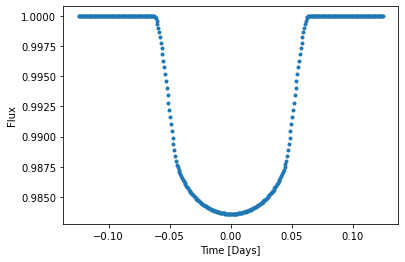

In [2]:
lc = LightCurveSimulator.ShortTransit()
lc.plotlc()

As you can see, the transit signal is clearly visible. The smooth ingress and egress show signs of limb darkening in the host stars. This is a theoretical transit signal. However, there is considerable noise in astronomical observations, which has to be taken into account when plotting any photometric data.  Additionally, there might also be systematic errors in your measurement due to incorrect aperture size, contamination from other sources or faulty sky determination. Let us look at how noise affects these lightcurves. We can add noise to the lightcurve as follows:

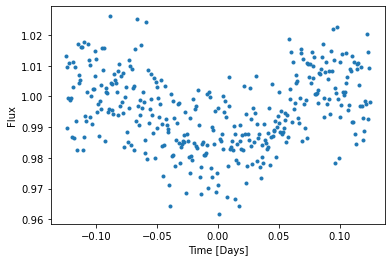

In [3]:
lc.add_noise(sn=100) # Creates a lightcurve with signal-to-noise 100.
lc.plotlc()

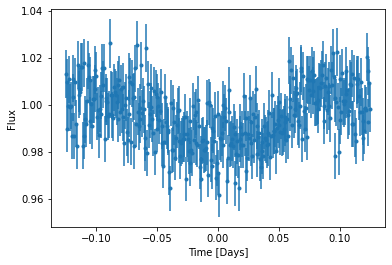

In [4]:
#You can also plot the errorbars in the lightcurve:
lc.plotlc_error()

As you can see the lightcurve is now much noisier. Make notes about the difference between the theoretical and noisy lightcurve. Remember that when we calculate the transit depth, which gives the planet radius (given the stellar radius), we requite both the out of transit flux and the lowest flux. You can test how the SN affects the lightcurve by testing different values. You will need to reset the lightcurve as follows:

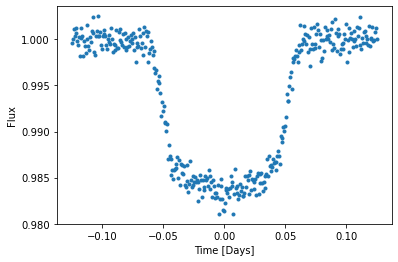

In [5]:
lc.reset()
lc.add_noise(sn=1000)
lc.plotlc()

<div class="alert alert-block alert-success">
    
### Your turn - find a suitable signal-to-noise value to measure the transit depth
    
As you see, the lower the signal-to-noise, the harder it is to detect the transit. What is the limit for you to detect the transit by eye? What other properties of the lightcurve do you think this depends on?
</div>

<a id="sec:sampling"></a>
## 2. Time sampling of lightcurves

The theoretical lightcurve you are given has a transit length of $\sim$3h and the lightcurve as a length of 6 hours with timestamps every minute. As we will see in Chapter 2, to increase the signal-to-noise of a photometric measurement, we will either need to increase the exposure time, the throughput of the telescope and instrument or use a larger telescope aperture. If the exposure time is increased, this of course means that the time between observations increases. We can see how the lightcurve is affected if we keep only every tenth datapoint:

<ErrorbarContainer object of 3 artists>

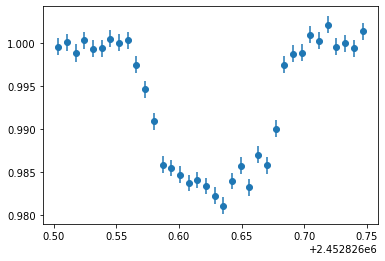

In [6]:
t, f, e = lc.thin_lightcurve(10) # keeps only every tenth datapoint
pylab.errorbar(t, f, e, ls='None', marker='o')

<div class="alert alert-block alert-success">

### Your turn - what do you think the limit is at which we can still detect the transit?

It is clear that we need to observe the object at least once during transit to detect it. What do you think the limit is for a sensible detection?
</div>

<a id="sec:unequal"></a>
## 3. Unequally sampled data 

Often, we might miss observations due to bad weather, technical issues or because other observations on the telescope take higher priority, this will result in unevenly sampled data. We can simulate the effect of unequal sampling as follows:

<ErrorbarContainer object of 3 artists>

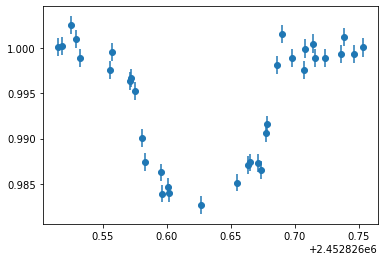

In [7]:
tr, fr, er = lc.random_subsample(0.1) #keeps 10\% of data
pylab.errorbar(tr, fr, er, ls='None', marker='o')

<div class="alert alert-block alert-success">

### Your turn: How does random sampling affect the lightcurve compared to simply lowering the sampling rate?
Rerun this function several times to see how tjhe randomness effects the outcome.
</div>

<a id="sec:outliers"></a>
## 4. Outliers
In some cases, there will be outliers in your data, that might be due to cosmic ray hits or other problems in the data. Lets have a look how they affect the lightcurve. 

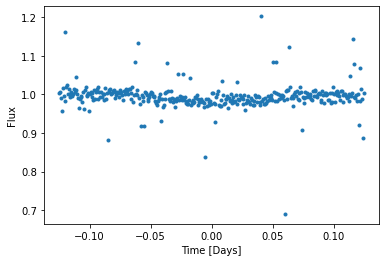

In [8]:
lc.reset()
lc.add_noise(100)
lc.add_outliers(0.1, 0.1)
lc.plotlc()

<div class="alert alert-block alert-success">

### Your turn - How do outliers affect the required timesampling?

Have a look at your outlier lighurve. This is the same SN=100 lightcurve from before, but the catastrophic outliers make it difficult to see the transit.
    
Have a go at thinning the outlier dataset. Assuming that 10\% of datapoints are catastrophic outliers, how does this affect your required timesampling?
</div>

<a id="sec:fulllc"></a>
## 5. A full expoplanet lightcurve with multiple transits
Now we have considered the impact of timesampling and signal-to-noise on an individual transit, we will look at a long lightcurve. If we want to measure the orbit of a planet, we will need to detect several orbits, this means long term minotoring of the lightcurve. Below, we will look at a theoretical lightcurve, simulated for the same setup as above.

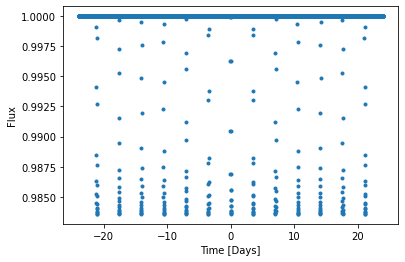

In [9]:
lclong = LightCurveSimulator.LongLightcurve()
lclong.plotlc_error()

You can adjust the xaxis ort yaxis if you like:

(0.0, 1.0)

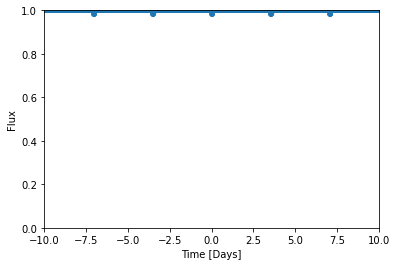

In [10]:
lclong.plotlc()
pylab.xlim(-10, 10)
pylab.ylim(0,1)

<a id="sec:astro"></a>
## 6. Unequally sampled data in astronomical datasets

In astronomy, datasets are generally not truly randomly sampled as seen above. Sampling is often limited by observational constraints. Objects can generally only be observed during the night, and once the telescope is pointed at an object, several imaged will be taken. This might not affect the shorter transits we looked at above, but it severaly affects longer monitoring like the one we just studied. Below, you can check how a general observation pattern can affect detection of multiple transits.

<div class="alert alert-block alert-success">

### Your turn - SN, timesampling and outliers for observations covering several transits

Consider the impact of signal-to-noise, time sampling and outliers for long lightcurves. Are there any differences? Also consider that for long lightcurves, there might be gaps in lightcurves for stretches of time.

Here we modify the above lightcurve to simulate an actual observing campaign. The length of each observation (obslength) is 1h (time is in unit of days), we are observing the source one per night (obspernight), we assume that 50% of observations are missed (missedfrac) and that half of a 24h day is usable as nighttime (nightfrac).
</div>

In [11]:
obs = lclong.realistic_sampling(obslength=1./24, obspernight=1, missedfrac=0.5, nightfrac=0.5)

<ErrorbarContainer object of 3 artists>

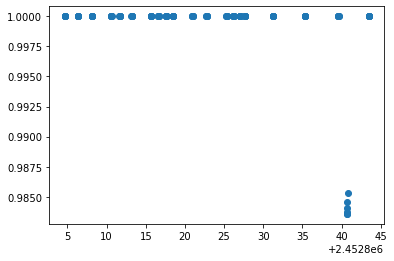

In [12]:
pylab.errorbar(obs[0], obs[1], obs[2], ls='None', marker='o')
#Here obs[0] is the time, obs[1] the flux

<div class="alert alert-block alert-success">
    
### Your turn: try the "realistic sampling" with different parameters. Do you notice any issues?
</div>

<div class="alert alert-block alert-success">
    
### Your turn: Exoplanet detection and surveys

Given the above examples and exercises, comment on timesampling needed for detection of a periodic source. What needs to be taken into account when combining the requirement from your analysis of the lightcurve covering a single or multiple transits?
<\div>

<a id="sec:summary"></a>
<div class="alert alert-block alert-info">

## Summary:

After finishing this notebook, you should have:

- learned how time-sampling and SN affect the observability of transits
- written down requirements for your own exoplanet observations
- prepared a short summary of the above to be checked by staff

In Coursework A, you will be asked to apply part of these techniques.
</div>